In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])

In [2]:
import sys
sys.path.append("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Functions")
from Functions_Squat import signed_error, features_front, equal_lengths, features_side_R

In [3]:
con_err, con_interp, corr_con, ecc_err, ecc_interp, corr_ecc = signed_error(200,"C:\\Users\\Cian\\Downloads\\Squat Training\\Heel Lift.mp4")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Side
[array([[-1.47804809, -0.08481336, -0.81539148],
       [-1.40441054, -0.06496419, -0.83494971],
       [-1.3678045 , -0.07328538, -0.82065598],
       [-1.27384081, -0.0868346 , -0.79438936],
       [-1.24613832, -0.06569644, -0.77497734],
       [-1.17868476, -0.08565773, -0.73312082],
       [-1.13140677, -0.1121181 , -0.68719072],
       [-0.96085593, -0.08216301, -0.65723563],
       [-0.86673472, -0.10107571, -0.6192138 ],
       [-0.78952093, -0.10492684, -0.57579411],
       [-0.71085469, -0.09849413, -0.52847933],
       [-0.65175829, -0.14800178, -0.48621318],
       [-0.57694742, -0.11679836, -0.42024644],
       [-0.54028257, -0.12945955, -0.35651862],
       [-0.48983979, -0.10106674, -0.31400281],
       [-0.47352762, -0.11278338, -0.31451858],
       [-0.5215239 , -0.10865149, -0.31370112],
       [-0.55316855, -0.15016146, -0.27808953],
       [-0.62654936, -0.14116483, -0.24395531],
       [-0.65406973, -0.15959912, -0.2301788

error: (m>k) failed for hidden m: fpcurf0:m=1

In [3]:
#For Video called "Heel Lift"
list1 = [0,2.73,4.5,5.69,6.18,7.74,9.09,9.54,10.95,12.51,13.68,15.64,16.78,17.4,19.34,20.35,21.01,22.85,24.23,24.82,26.55,27.8]
list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#For video called "Caving Knees"
# list1 = [0, 3.12, 4.38, 6.35, 7.62,8.83,10.71,11.77,13.04,14.8,15.98,17.4,19.37,20.09,21.57,23.43,24.06,25.5,27.13,28.12,29.48,31.15,32.87,34.47,35.89,36.74,38.6,39.78,40.74,42.24,43.95]
# list2 = [0, 2, 1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#For video called 1(6) in correct training data.
# list1 = [0,0.11,0.83,1.4,2.19,2.96,3.56,4.33,5.04,5.64,6.49,7.31,7.81,8.57,9.38,9.93,10.71,11.49,11.97,12.83,13.62,14.06,14.86,15.62,16.1,16.85,17.63]
# list2 = [2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

In [4]:
#initiallize empty lists
con = []
ecc = []

path = "C:\\Users\\Cian\\Downloads\\Squat Training\\Heel Lift.mp4"
# path = "C:\\Users\\Cian\\Downloads\\Squat Vids\\1 (6).mp4"
Features = features_front(path)
print(Features.shape)

#Loop through list2
for j in range(len(list2)):
    if list2[j] == 0 or j==0:
        pass
    elif list2[j] == 1:
        #find the index range that will extract the correct range of angles. Note that the FPS of the video is 15.
        ind1 = int(list1[j]*15)
        ind2 = int(list1[j+1]*15)
        #append the angles within this range to the concentric list above "con"
        con.append(Features[ind1:ind2])
    elif list2[j] == 2:
        #find the index range that will extract the correct range of angles. Note that the FPS of the video is 15.
        ind1 = int(list1[j]*15)
        ind2 = int(list1[j+1]*15)

        #append the angles within this range to the concentric list above "con"
        ecc.append(Features[ind1:ind2])

(424, 4)


In [5]:
####For Front

N = 200

con_eq = equal_lengths(con,N)[:,:,:3]
ecc_eq = equal_lengths(ecc,N)[:,:,:3]

con_eq[:,:,0] = np.rad2deg(con_eq[:,:,0])
ecc_eq[:,:,0] = np.rad2deg(ecc_eq[:,:,0])

con_model = np.load("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Technique Modelling\\Models\\Front Concentric.npz")
ecc_model = np.load("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Technique Modelling\\Models\\Front Eccentric.npz")

time = np.linspace(0,1,N)
T = np.stack((np.ones(N),time))
T2 = np.stack((np.ones(N),time,time**2))

con_corr0 = np.rad2deg(np.arctan2(con_model['Torso'][1]@T,con_model['Torso'][0]@T)).reshape(N,1)
con_corr1 = (con_model['Horizontal Knee Separation']@T2).reshape(N,1)
con_corr2 = (con_model['Horizontal Foot Separation']@T).reshape(N,1)
con_corr = np.concatenate((con_corr0, con_corr1, con_corr2),axis=1)

ecc_corr0 = np.rad2deg(np.arctan2(ecc_model['Torso'][1]@T,ecc_model['Torso'][0]@T)).reshape(N,1)
ecc_corr1 = (ecc_model['Horizontal Knee Separation']@T2).reshape(N,1)
ecc_corr2 = (ecc_model['Horizontal Foot Separation']@T).reshape(N,1)
ecc_corr = np.concatenate((ecc_corr0, ecc_corr1, con_corr2),axis=1)

#now find error
con_err = con_eq-con_corr
ecc_err = ecc_eq-ecc_corr
con_err.shape

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

In [11]:
####For side

N = 200

con_eq = equal_lengths(con,N)[:,:,:3]
ecc_eq = equal_lengths(ecc,N)[:,:,:3]

con_eq[:,:,0] = np.rad2deg(con_eq[:,:,0])
ecc_eq[:,:,0] = np.rad2deg(ecc_eq[:,:,0])

con_model = np.load("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Technique Modelling\\Models\\Side Concentric.npz")
ecc_model = np.load("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Technique Modelling\\Models\\Side Eccentric.npz")
time = np.linspace(0,1,N)
T = np.stack((np.ones(N),time))
T2 = np.stack((np.ones(N),time,time**2))

con_corr0 = np.rad2deg(np.arctan2(con_model['Torso'][1]@T2,con_model['Torso'][0]@T2)).reshape(N,1)
con_corr1 = (con_model['Heel Height']@T).reshape(N,1)
con_corr2 = (con_model['Vertical Hip to knees']@T2).reshape(N,1)
con_corr = np.concatenate((con_corr0, con_corr1, con_corr2),axis=1)

ecc_corr0 = np.rad2deg(np.arctan2(ecc_model['Torso'][1]@T2,ecc_model['Torso'][0]@T2)).reshape(N,1)
ecc_corr1 = (ecc_model['Heel Height']@T).reshape(N,1)
ecc_corr2 = (ecc_model['Vertical Hip to knees']@T2).reshape(N,1)
ecc_corr = np.concatenate((ecc_corr0, ecc_corr1, con_corr2),axis=1)

#now find error
con_err = con_eq-con_corr
ecc_err = ecc_eq-ecc_corr
con_err.shape

(7, 200, 3)

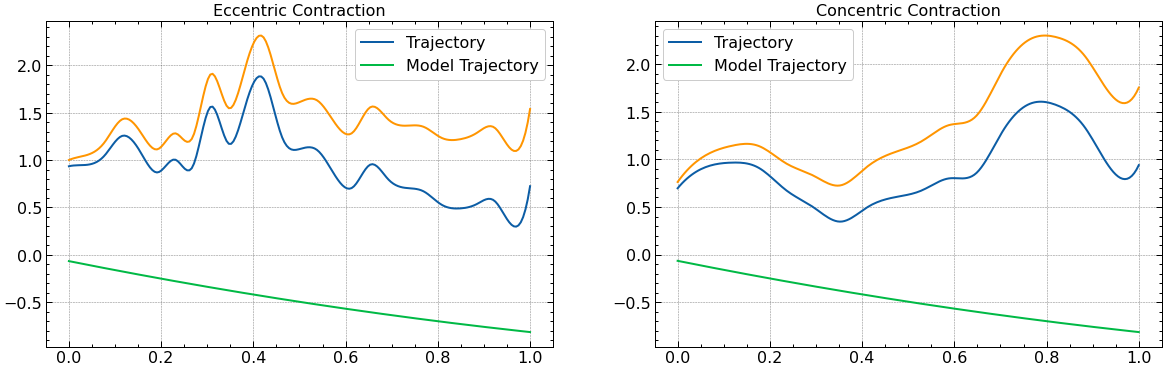

In [13]:
rep = 0
feat = 2
t = np.linspace(0,1,con_eq.shape[1])

#plot first
if feat==0:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    ax1.plot(t,ecc_eq[rep,:,feat], label='Trajectory')
    ax1.plot(t,ecc_corr[:,feat], label='Model Trajectory')
    ax1.plot(t,ecc_err[rep,:,feat])
    ax1.legend()
    ax1.set_title('Eccentric Contraction')
    ax1.set_ylim(-180,180)

    ax2.plot(t,con_eq[rep,:,feat], label='Trajectory')
    ax2.plot(t,con_corr[:,feat], label='Model Trajectory')
    ax2.plot(t,con_err[rep,:,feat])
    ax2.legend()
    ax2.set_title('Concentric Contraction')
    ax2.set_ylim(-180,180)
    
else:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    ax1.plot(t,ecc_eq[rep,:,feat], label='Trajectory')
    ax1.plot(t,ecc_corr[:,feat], label='Model Trajectory')
    ax1.plot(t,ecc_err[rep,:,feat])
    ax1.legend()
    ax1.set_title('Eccentric Contraction')

    ax2.plot(t,con_eq[rep,:,feat], label='Trajectory')
    ax2.plot(t,con_corr[:,feat], label='Model Trajectory')
    ax2.plot(t,con_err[rep,:,feat])
    ax2.legend()
    ax2.set_title('Concentric Contraction')

In the following, the dimensions are as follows:
- rep number
- section of rep (beginning, middle, end)
- feature

In [14]:
#first acquire the means for all concentric repetitions
means_con = []
for i in range(len(con_err)):
    stages = np.array_split(con_err[i,:,:],3)
    means_con.append([np.mean(stage[np.argsort(np.abs(stage),axis=0), np.arange(con_err.shape[2])][-15:],axis=0) for stage in stages])
    
means_con = np.transpose(np.array(means_con),(1,0,2))

#first acquire the means for all concentric repetitions
means_ecc = []
for i in range(len(ecc_err)):
    stages = np.array_split(ecc_err[i,:,:],3)
    means_ecc.append([np.mean(stage[np.argsort(np.abs(stage),axis=0), np.arange(con_err.shape[2])][-15:],axis=0) for stage in stages])
    
means_ecc = np.transpose(np.array(means_ecc),(1,0,2))

means_con.shape

(3, 7, 3)

In [15]:
means_con

array([[[-17.57619908,   0.85783298,   1.15195457],
        [-20.60054731,   1.32518109,   1.09856618],
        [-14.36308055,   0.97354486,   0.98995948],
        [ -9.19474501,   0.31819617,   0.89808828],
        [ -8.07604594,   0.29956915,   0.75814729],
        [-14.1984185 ,   0.8739607 ,   1.10234199],
        [-17.44117287,   0.92114709,   1.08477585]],

       [[-12.8237871 ,   0.61585028,   1.43702459],
        [-19.57612797,   0.32616071,   2.03413898],
        [-13.43024833,   0.3755743 ,   2.14969518],
        [ -8.76534148,   0.38198684,   2.24508076],
        [ -8.13572698,   0.85220931,   2.13830222],
        [ -4.95634353,   0.54635143,   2.21485856],
        [-13.16590476,   0.43246365,   1.48518894]],

       [[-11.77565055,   0.41837214,   2.2875118 ],
        [-20.63895791,   0.46690307,   2.06891004],
        [-11.77731503,   0.49104071,   2.39559044],
        [ -5.32885027,   0.39404212,   2.22627817],
        [ -2.97300054,   0.48613388,   2.32128258],
        

In [16]:
np.savetxt("C:\\Users\\Cian\\Downloads\\con_torsoside.txt", means_con[:,:,0])
np.savetxt("C:\\Users\\Cian\\Downloads\\con_heel.txt", means_con[:,:,1])

np.savetxt("C:\\Users\\Cian\\Downloads\\ecc_torsoside.txt", means_ecc[:,:,0])
np.savetxt("C:\\Users\\Cian\\Downloads\\ecc_heel.txt", means_ecc[:,:,1])

In [64]:
# np.savetxt("C:\\Users\\Cian\\Downloads\\con_torsofront.txt", means_con[:,:,0])
# np.savetxt("C:\\Users\\Cian\\Downloads\\con_knee.txt", means_con[:,:,1])
# np.savetxt("C:\\Users\\Cian\\Downloads\\con_foot.txt", means_con[:,:,2])
# np.savetxt("C:\\Users\\Cian\\Downloads\\ecc_torsofront.txt", means_ecc[:,:,0])
# np.savetxt("C:\\Users\\Cian\\Downloads\\ecc_knee.txt", means_ecc[:,:,1])
# np.savetxt("C:\\Users\\Cian\\Downloads\\ecc_foot.txt", means_ecc[:,:,2])

In [57]:
np.linspace(-1,1,7)

array([-1.        , -0.66666667, -0.33333333,  0.        ,  0.33333333,
        0.66666667,  1.        ])